# Exercises in Data Transformation and Exploratory Data Analysis

This notebook contains the exercises for the class of February 5, 2025, in the course Data & Things at Roskilde University.

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1

Plot the number of Cinemas in Danmark over the years. The next cell loads in the needed data for you if you have the file "DK_cinemas.csv" in the same folder as this notebook. 

In [136]:
cinema_data = pd.read_csv('../DK_cinemas.csv', sep=";")
years = cinema_data["Year"].tolist()
cinemas = cinema_data["Cinemas"].tolist()

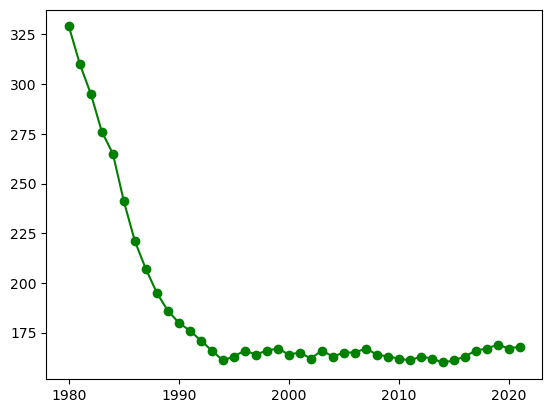

In [137]:
plt.plot(years, cinemas, color='green', marker='o', linestyle='solid')
plt.show()

## Exercise 2

In this exercise, we are going to use the `penguins` dataset from the Seaborn package. The cell below loads the data

In [138]:
penguins_data = sns.load_dataset("penguins")

Based on the `Penguins` dataset, answer the following questions:

1. Make a barplot that shows how many penguins there are of each species in the dataset. Support the plot by calculating the numbers.
2. Make a barplot that shows the average body mass for each species of penguin. Support the plot by calculating the numbers
3. Make a boxplots that shows the distribution of the body mass for each species of penguin. Support the plot by calculating the numbers.
4. Make a scatterplot that shows the correlation between body mass (in g) and flipper length (in mm). Support the plot by calculating the numbers.
5. Use boxplots and histograms to show how bill length, bill depth, flipper length and body mass varies between species and sex.
6. Visualise how the linear correlation between body mass and flipper length varies between species and sex.

In [139]:
penguins_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## 1. Make a barplot that shows how many penguins there are of each species in the dataset. Support the plot by calculating the numbers.

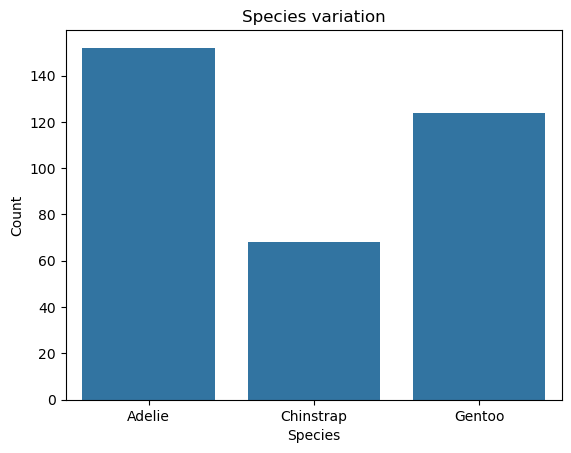

In [140]:
sns.countplot(x = "species", data = penguins_data)
plt.title("Species variation")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

## 2. Make a barplot that shows the average body mass for each species of penguin. Support the plot by calculating the numbers

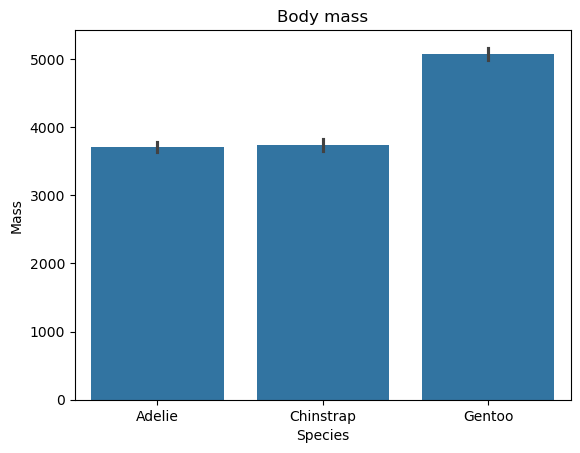

In [141]:
sns.barplot(x="species", y = "body_mass_g", data = penguins_data, estimator='mean')
plt.title("Body mass")
plt.xlabel("Species")
plt.ylabel("Mass")
plt.show()

In [142]:
penguins_data[penguins_data["species"] == "Adelie"]["body_mass_g"].mean()

3700.662251655629

## 3. Make a boxplots that shows the distribution of the body mass for each species of penguin. Support the plot by calculating the numbers.

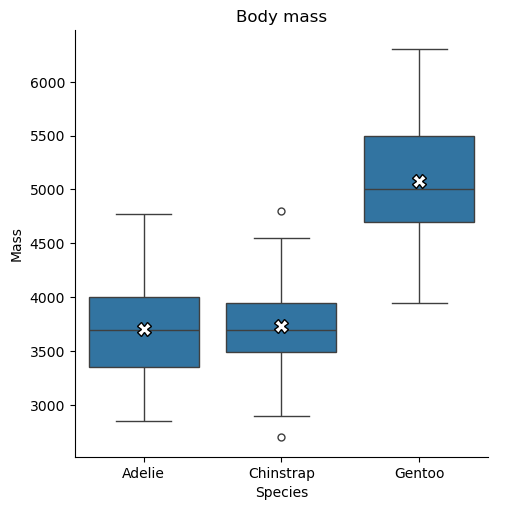

In [143]:
sns.catplot(x="species", y = "body_mass_g", data = penguins_data, estimator='mean', kind="box", showmeans=True, meanprops={"marker": "X", "markerfacecolor": "white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Body mass")
plt.xlabel("Species")
plt.ylabel("Mass")
plt.show()

## 4. Make a scatterplot that shows the correlation between body mass (in g) and flipper length (in mm). Support the plot by calculating the numbers.

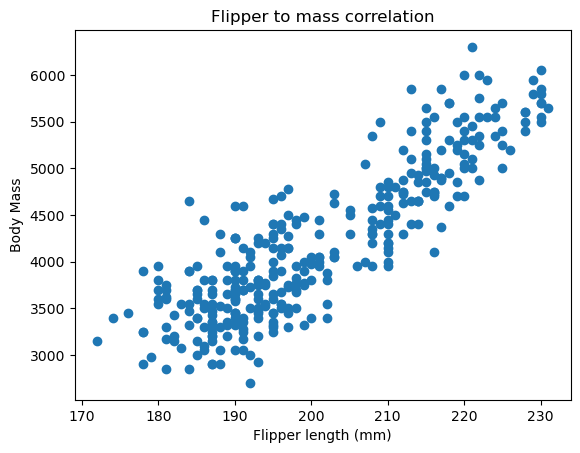

In [144]:
#sns.regplot(x="flipper_length_mm", y = "body_mass_g", data = penguins_data)
plt.scatter(x="flipper_length_mm", y = "body_mass_g", data = penguins_data)
plt.title("Flipper to mass correlation")
plt.xlabel("Flipper length (mm)")
plt.ylabel("Body Mass")
plt.show()

## 5. Use boxplots and histograms to show how bill length, bill depth, flipper length and body mass varies between species and sex.

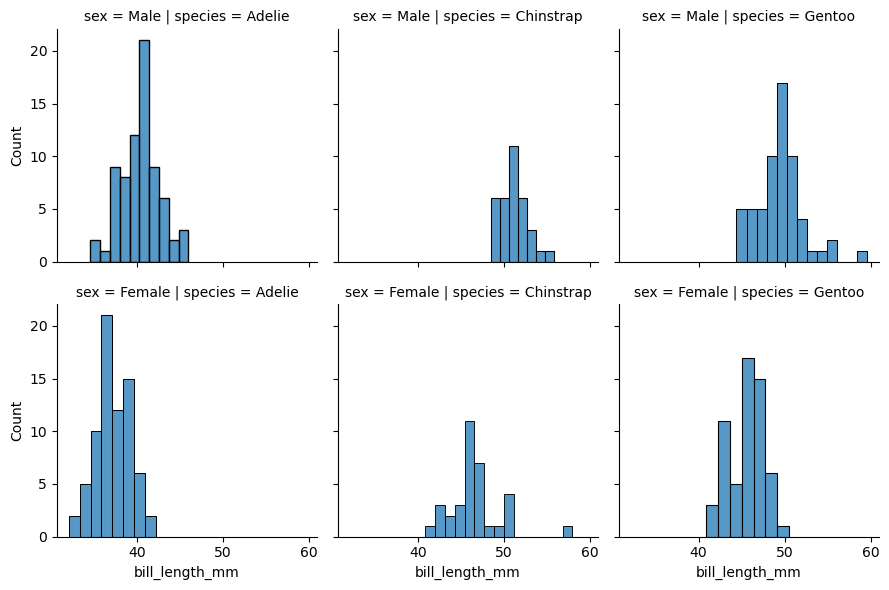

In [145]:
#sns.pairplot(data = penguins_data)
g=sns.FacetGrid(penguins_data, col="species", row="sex")
g.map(sns.histplot, "bill_length_mm")

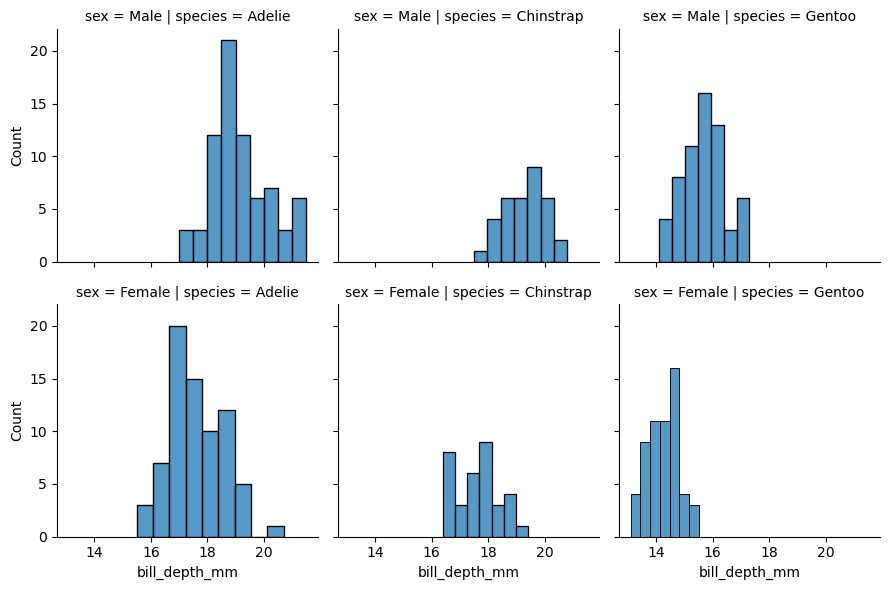

In [146]:
g=sns.FacetGrid(penguins_data, col="species", row="sex")
g.map(sns.histplot, "bill_depth_mm")

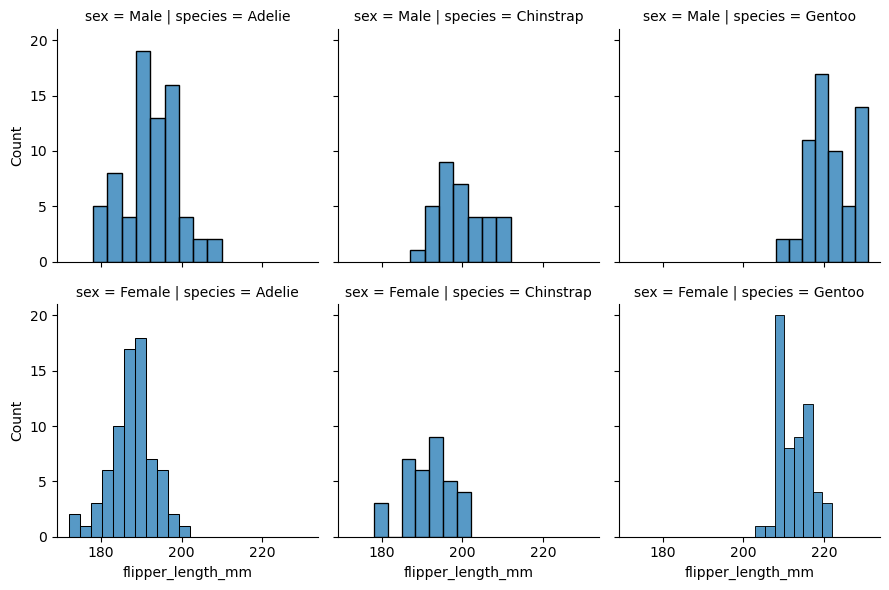

In [147]:
g=sns.FacetGrid(penguins_data, col="species", row="sex")
g.map(sns.histplot, "flipper_length_mm")

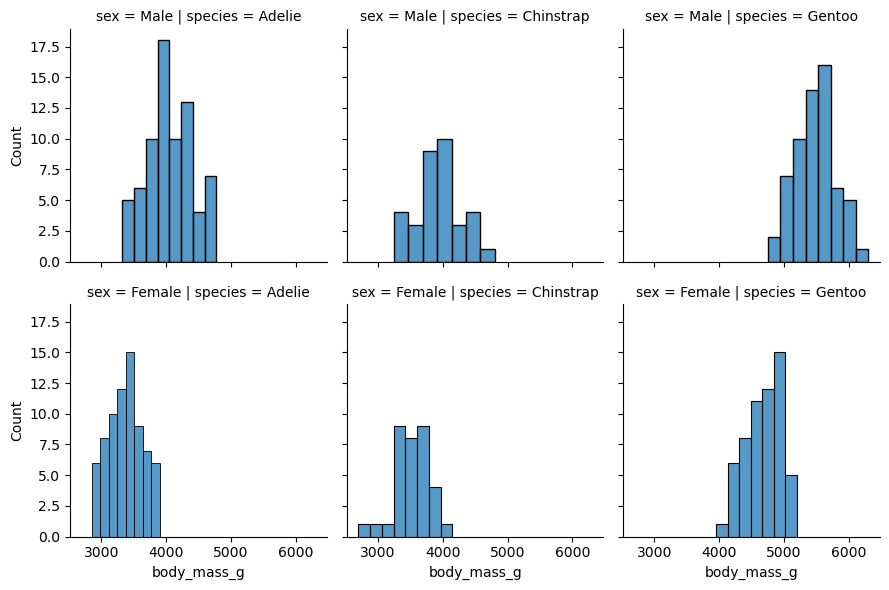

In [148]:
g=sns.FacetGrid(penguins_data, col="species", row="sex")
g.map(sns.histplot, "body_mass_g")

## 6. Visualise how the linear correlation between body mass and flipper length varies between species and sex.

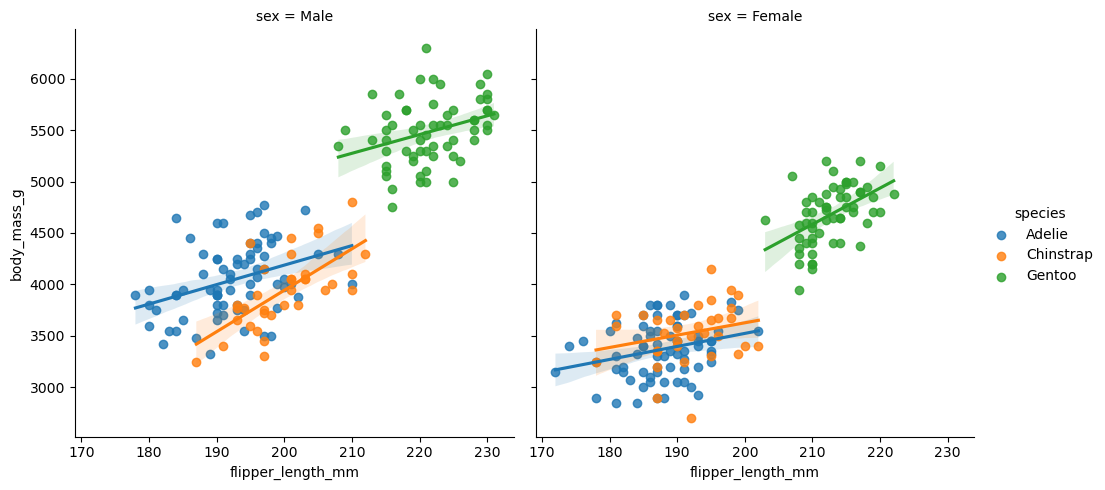

In [149]:
sns.lmplot(data=penguins_data, x="flipper_length_mm", y="body_mass_g",
    hue="species", col="sex")
plt.show()

## Exercise 3

Do an exploratory data analysis of the adult dataset. The cell below loads the dataset from UCI Machine Learning Repository into a pandas dataframe called `adult_data`. It requires that you have installed the package `ucimlrepo`. (Otherwise the dataset is on model for this class.)

In [150]:
from ucimlrepo import fetch_ucirepo 
adult = fetch_ucirepo(id=2) 
X = adult.data.features 
y = adult.data.targets 
X["income"] = y
adult_data = X.copy()

adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [151]:
adult_data.describe() # you could make plot of this somehow

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [152]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [153]:
adult_data.nunique

<bound method DataFrame.nunique of        age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial

In [168]:
adult_data["native-country"].isna().sum()

274

In [184]:
adult_data["fnlwgt"].sum()

9263575662

In [177]:
adult_data["capital-gain"].value_counts()

capital-gain
6612         1
1111         1
22040        1
1639         1
1731         1
         ...  
99999      244
7298       364
7688       410
15024      513
0        44807
Name: count, Length: 123, dtype: int64

In [177]:
adult_data

capital-gain
6612         1
1111         1
22040        1
1639         1
1731         1
         ...  
99999      244
7298       364
7688       410
15024      513
0        44807
Name: count, Length: 123, dtype: int64

In [154]:
my_adult_data = adult_data.replace({">50K.":">50K", "<=50K.":"<=50K"})

In [155]:
my_adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


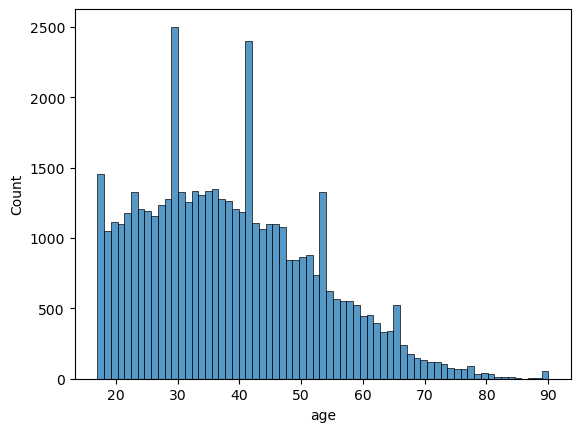

In [156]:
sns.histplot(x="age", data = adult_data)
plt.show()

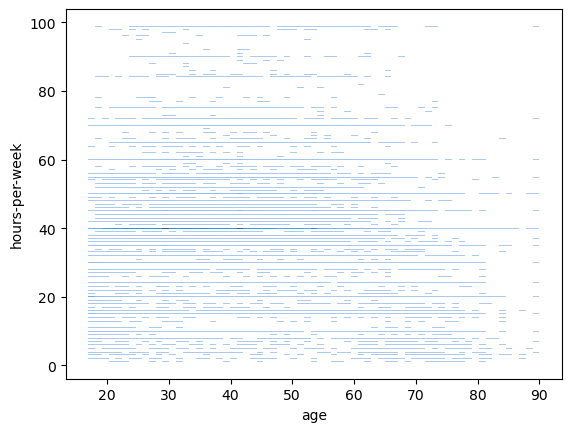

In [181]:
sns.histplot(x="age", y="hours-per-week", data = adult_data)
plt.show()

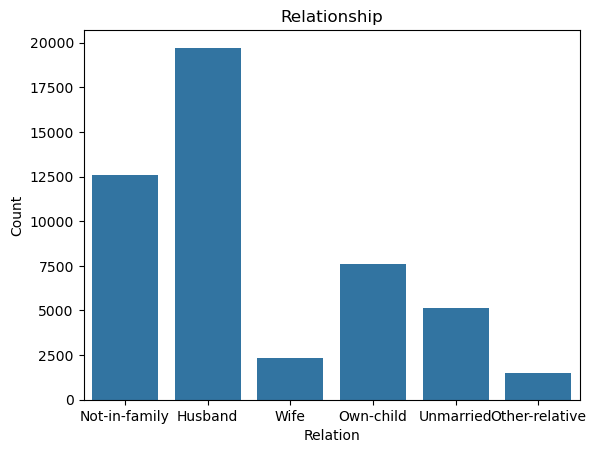

In [187]:
sns.countplot(x = "relationship", data = adult_data)
plt.title("Relationship")
plt.xlabel("Relation")
plt.ylabel("Count")
plt.show()

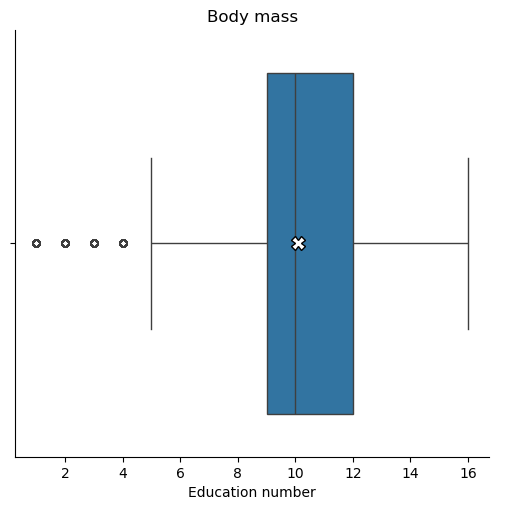

In [159]:
#sns.histplot(x="education-num", data = adult_data)
#plt.show()

sns.catplot(x="education-num", data = adult_data, estimator='mean', kind="box", showmeans=True, meanprops={"marker": "X", "markerfacecolor": "white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Body mass")
plt.xlabel("Education number")
plt.show()

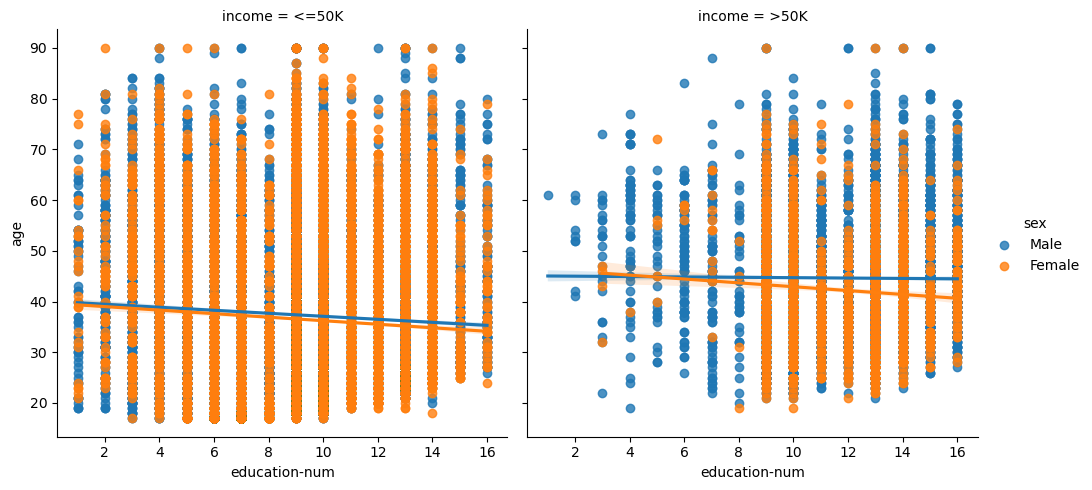

In [169]:
sns.lmplot(data=my_adult_data, x="education-num", y="age",
    hue="sex", col="income")
plt.show()

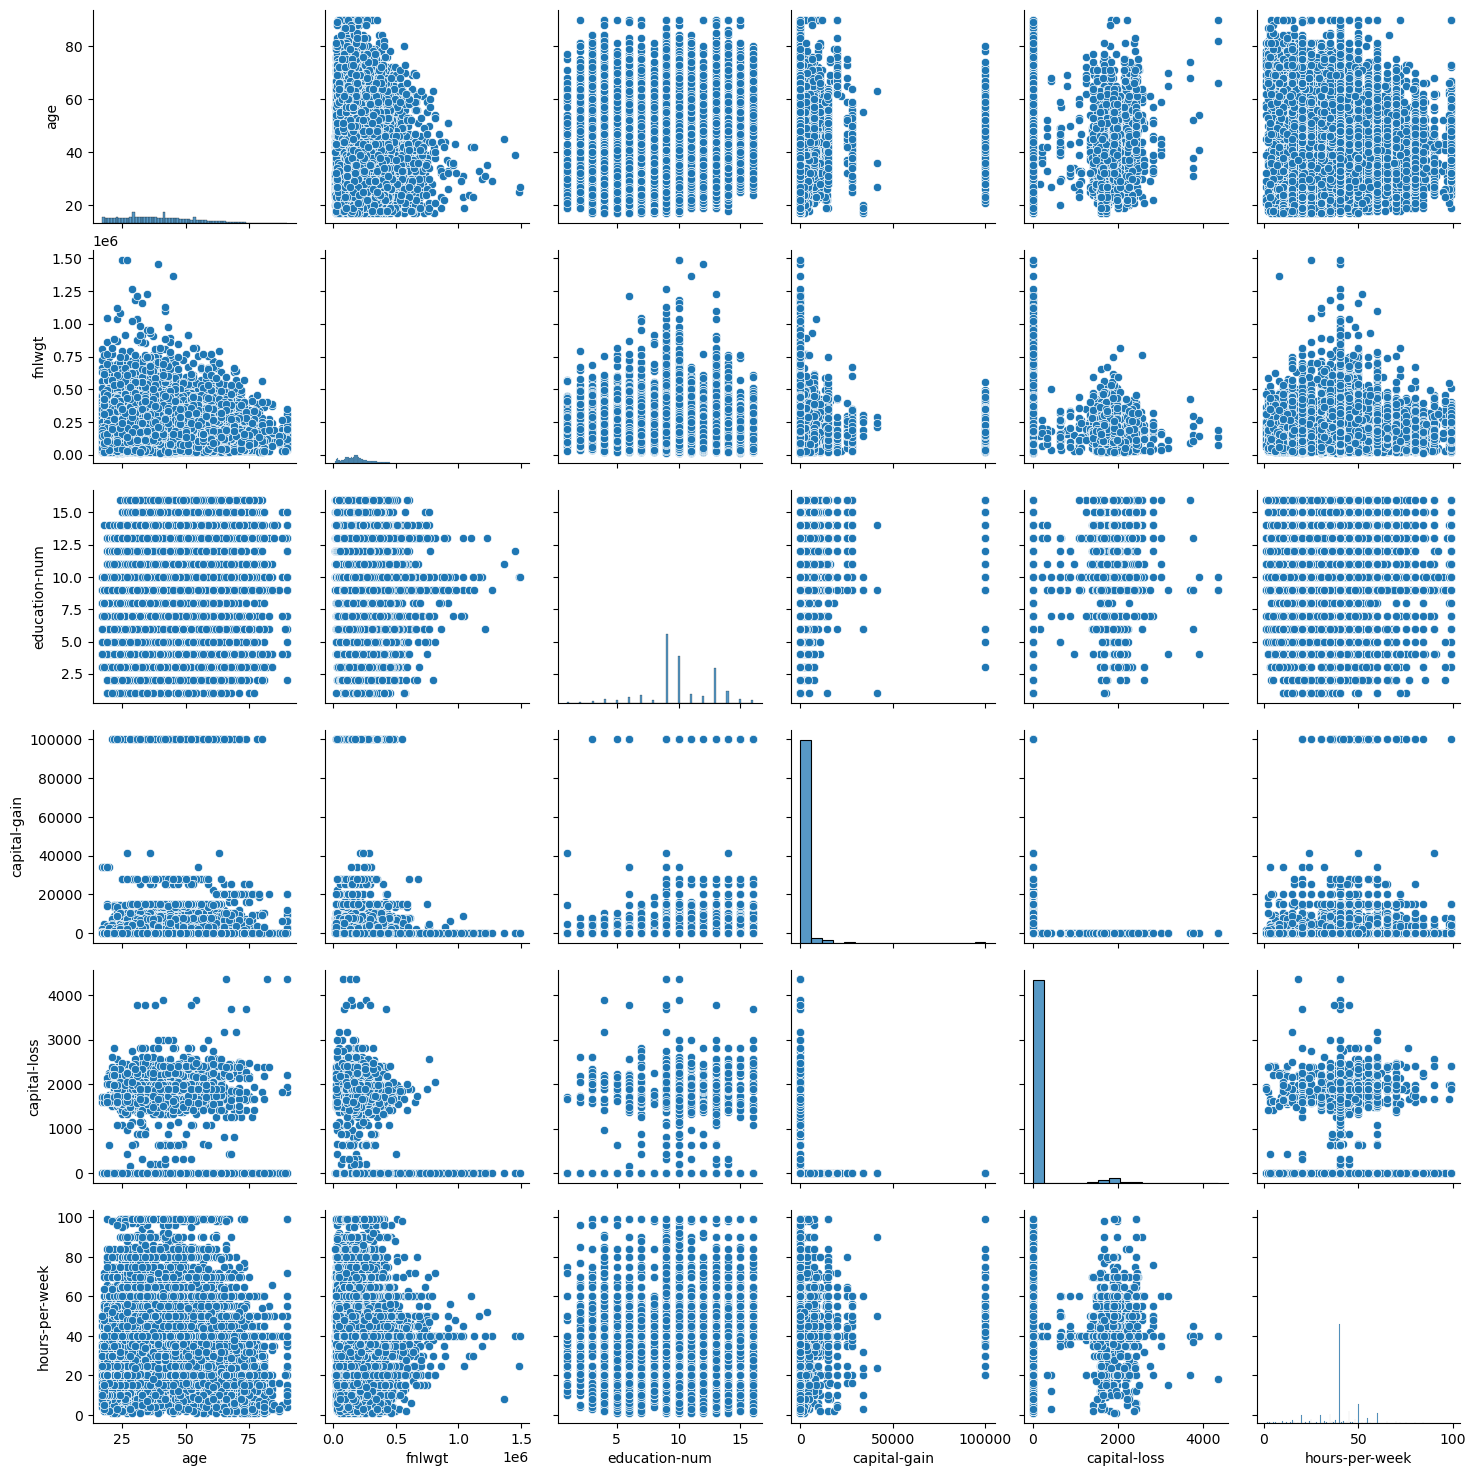

In [170]:
sns.pairplot(data = adult_data)

## Exercise 4

Complete an exploratory data analysis of the titanic dataset (it is on moodle). (Remember, you can load it in as `titanic_data = pd.read_csv("titanic_survival_data.csv")`)

In [ ]:
titanic = pd

## Exercise 5

Do an exploratory data analysis of the diabetes dataset. The cell below loads the dataset from the scikit learn package into the pandas dataframe called `diabetes_data`.

In [ ]:
from sklearn.datasets import load_diabetes
d_data = load_diabetes(as_frame=True)
diabetes_data = d_data.data
diabetes_data["Target"] = d_data.target

diabetes_data